In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [3]:
#droping Unnamed: 0
df.drop("Unnamed: 0", axis=1, inplace=True)
df

TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [4]:
#checking shape
df.shape

(200, 4)

There are 200 rows and 4 columns

In [5]:
#checking for null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There is no null value.

In [6]:
df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [7]:
#in the newspaper column there is huge difference between 7=75 percentile and maximum value so there might be some outliers
#the mean in newspaper is greater than median so the variable is right skewed

# EDA

# Univariate Analysis

<AxesSubplot:xlabel='sales', ylabel='Density'>

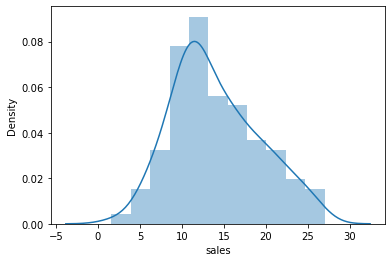

In [8]:
sn.distplot(df.sales)

The sales data is showing bell curved shape.

<AxesSubplot:xlabel='TV', ylabel='Density'>

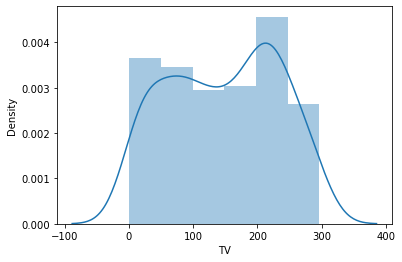

In [9]:
sn.distplot(df.TV)

The tv variable the range is from 0 to 300

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

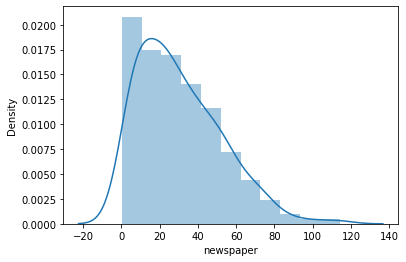

In [10]:
sn.distplot(df.newspaper)

the newspaper data is heavely right skewed and majority of the values lies between 0 and 40

<AxesSubplot:xlabel='radio', ylabel='Density'>

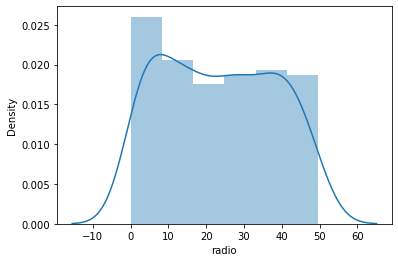

In [11]:
sn.distplot(df.radio)

In radio the range is 0 to 50

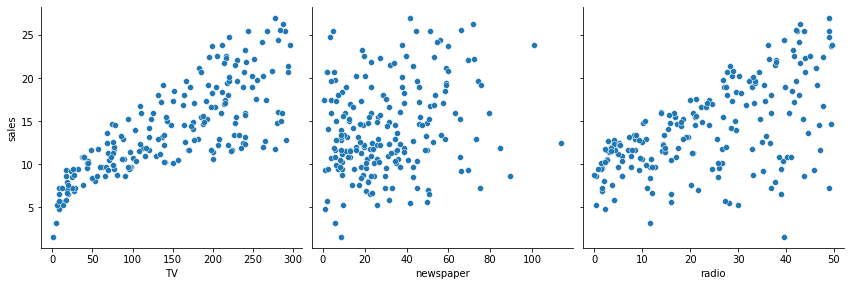

In [15]:
# Let's see how Sales are related with other variables using scatter plot.
sn.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

# Multi-variate Analysis

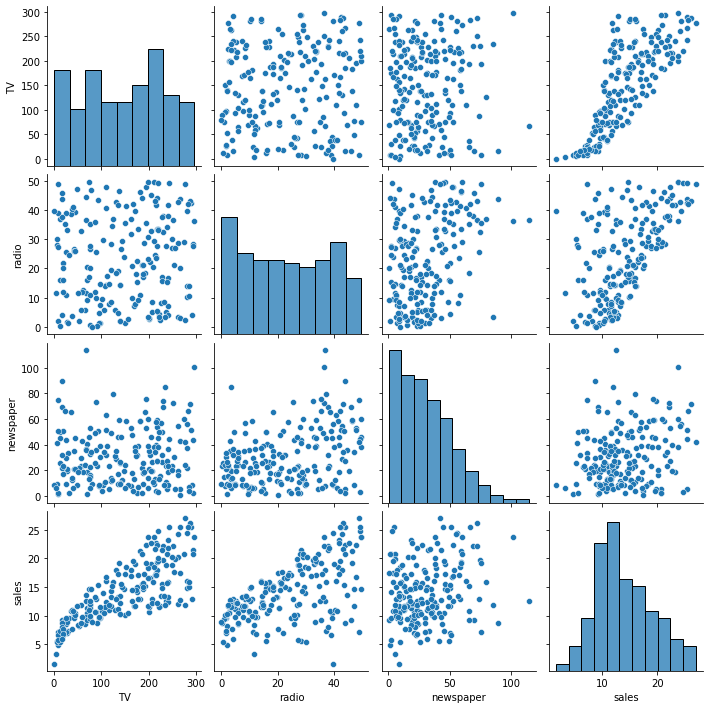

In [12]:
sn.pairplot(df)
plt.show()

# Checking for Corelation

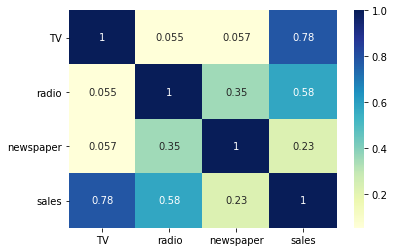

In [13]:
# Let's see the correlation between different variables.
sn.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

The tv and sales are highly correlated and the newspaper and sales are least correlated.

# Identifying Outliers

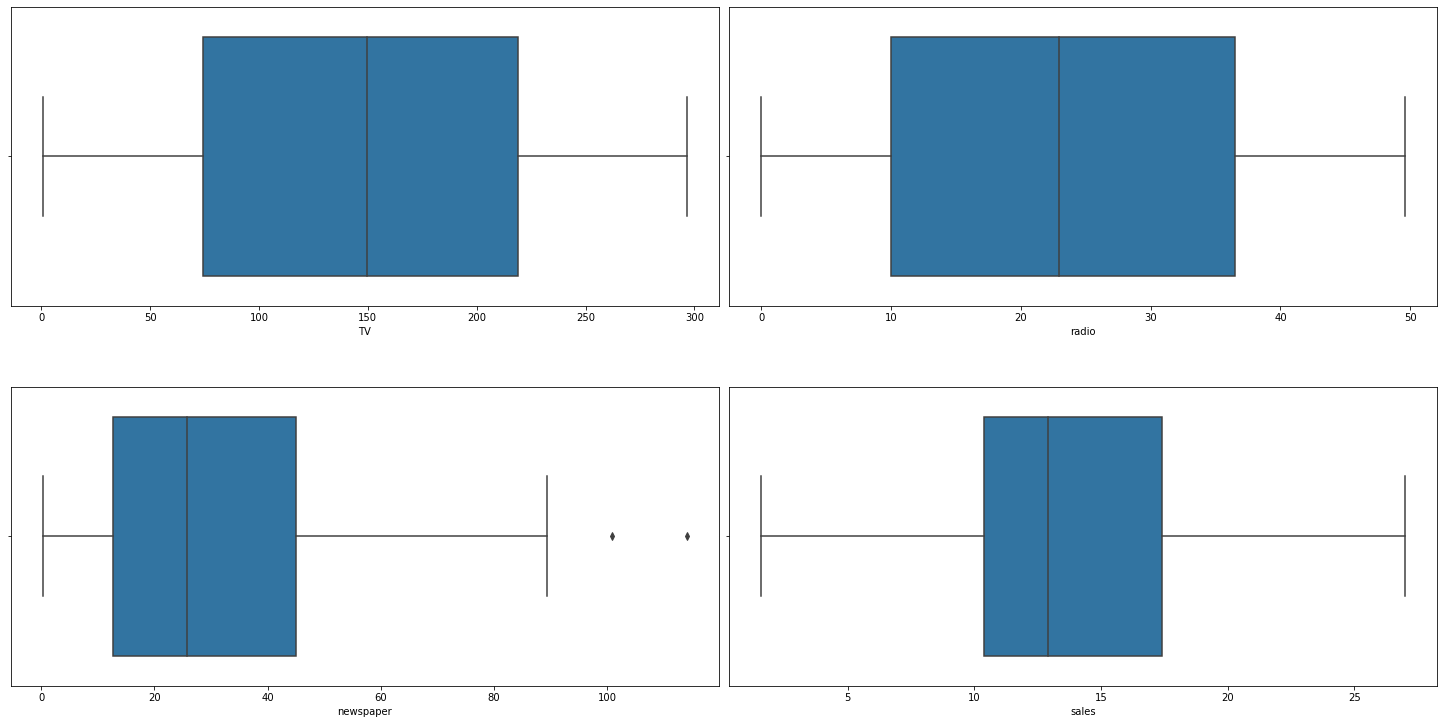

In [14]:
#ploting boxplot for outliers
fig, ax=plt.subplots(ncols=2,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sn.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# Skewness

In [16]:
#checking skewness
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

There is skewness and outliers present in newspaper

In [18]:
#using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))

In [19]:
df_new=df[(z<3).all(axis=1)]
df_new

TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[198 rows x 4 columns]

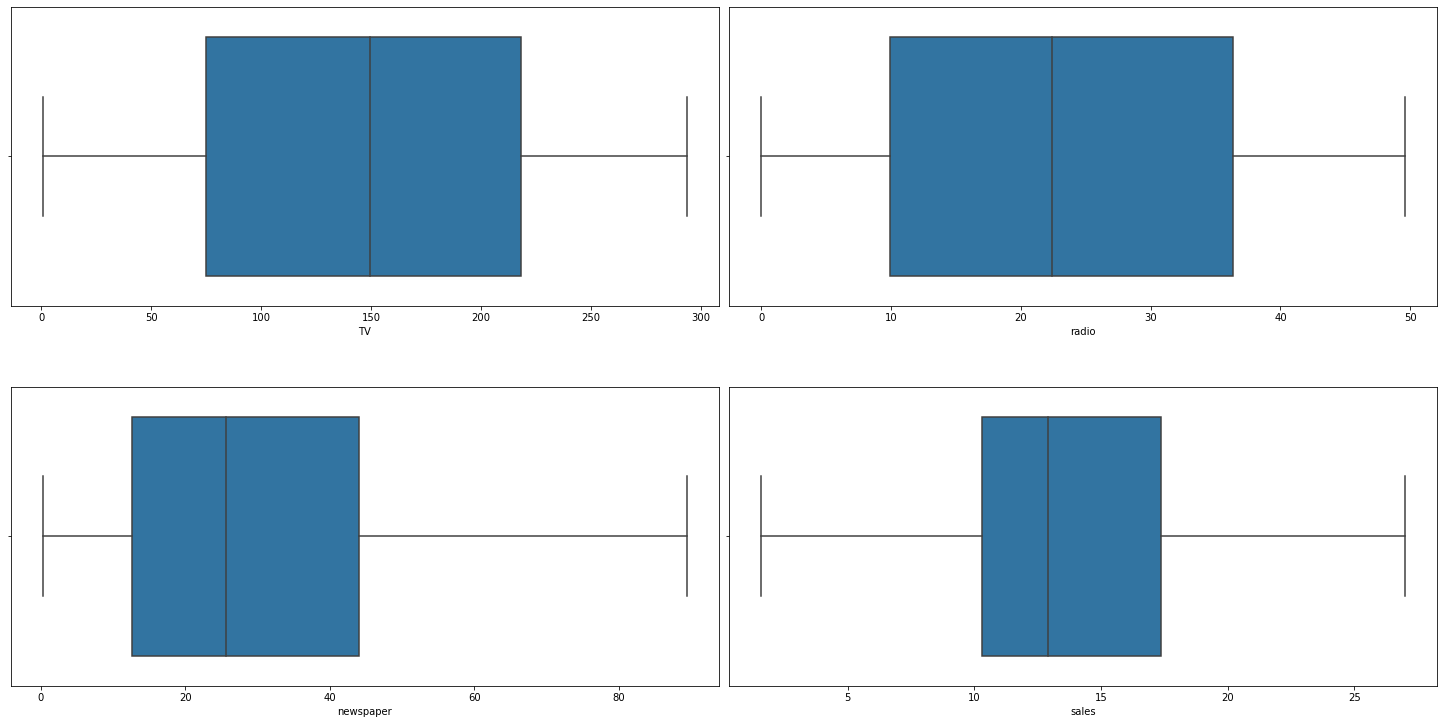

In [20]:
#ploting boxplot
fig, ax=plt.subplots(ncols=2,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df_new.items():
    if col != "type":
        sn.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

There is no outliers present in the data

In [21]:
#checking for skewness
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

The skewness is still more than .5 in newspaper.

In [22]:
#Spliting data in x and y
x=df_new.drop("sales",axis=1)
x

TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[198 rows x 3 columns]

In [24]:
y=df_new["sales"]

In [25]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [26]:
#using power transform to reduce skewness

In [28]:
from sklearn.preprocessing import power_transform

In [29]:
d1=power_transform(x)

In [30]:
d1=pd.DataFrame(d1, columns=x.columns)
d1

TV     radio  newspaper
0    0.955983  0.969110   1.604196
1   -1.192003  1.046234   0.831044
2   -1.646125  1.372968   1.607052
3    0.142934  1.147332   1.283768
4    0.456452 -0.735026   1.280622
..        ...       ...        ...
193 -1.288311 -1.423941  -0.687435
194 -0.521579 -1.287689  -1.146090
195  0.416577 -0.862474  -1.314437
196  1.467535  1.182269   1.517395
197  0.975625 -0.924437  -1.091084

[198 rows x 3 columns]

In [31]:
d1.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
dtype: float64

In [32]:
#the skewness has been treated
x=d1

# Find the best random_state

In [36]:
# Importing liabraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [37]:
#spliting train test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((138, 3), (138,), (60, 3), (60,))

In [38]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x,y)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print(" We are getting maximum  r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [42]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'n_neighbors': 5}




In [40]:
knn=KNeighborsRegressor(n_neighbors=5)
i=maxr2_score(knn,x,y)
print("\n")

print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")

 We are getting maximum  r2 score corresponding to 63 is 0.982324871146321


Mean r2 score for KNeighbor  Regression: 0.926636970602835
standard deviation in r2 score for KNeighbor   Regression 0.029318536429602055

___________________________________________________________________________________________________________



In [41]:
dtc=DecisionTreeRegressor()
parameters={"criterion" :( 'mse', 'friedman_mse', 'mae') ,'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(dtc,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'criterion': 'mse', 'max_features': 'auto'}




In [43]:
dtr=DecisionTreeRegressor(criterion = 'mse',max_features='auto')
i=maxr2_score(dtr,x,y)
print("\n")

print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")


 We are getting maximum  r2 score corresponding to 42 is 1.0


Mean r2 score for DecisionTreeRegressor : 0.9516390021799739
standard deviation in r2 score for DecisionTreeRegressor 0.01140643255591071

_____________________________________________________________________________________________________________



In [44]:
rfr=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(rfr,parameters,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'max_features': 'auto', 'n_estimators': 100}




In [45]:
rfr=RandomForestRegressor(max_features='auto',n_estimators=100)
i=maxr2_score(rfr,x,y)
print("\n")

print("Mean r2 score for RandomForestRegressor :",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")


 We are getting maximum  r2 score corresponding to 74 is 0.9986794624865593


Mean r2 score for RandomForestRegressor : 0.9765189951207119
standard deviation in r2 score for RandomForestRegressor  0.008419457138435745

_____________________________________________________________________________________________________________



In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'learning_rate': 0.1, 'n_estimators': 150}




In [47]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=150)
i=maxr2_score(gbr,x,y)
print("\n")

print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")

 We are getting maximum  r2 score corresponding to 65 is 0.9996609701054738


Mean r2 score for gradient boosting Regression: 0.9784705368501481
standard deviation in r2 score for gradient boosting Regression 0.008661158857841581

_____________________________________________________________________________________________________________



In [48]:
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'alpha': 0.01}




In [49]:
lsreg=Lasso(alpha=0.01)
i=maxr2_score(lsreg,x,y)
print("\n")

print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")

 We are getting maximum  r2 score corresponding to 90 is 0.9510735245239994


Mean r2 score for Lasso Regression: 0.8959751846282693
standard deviation in r2 score for Lasso Regression 0.019611891527998627

___________________________________________________________________________________________________________



In [51]:
#best model with best parameters
best_model=RandomForestRegressor(max_features='auto',n_estimators=100)
best_model.fit(x_train,y_train)
predict=best_model.predict(x_test)
print("""mean squared error is:
    """,mean_squared_error(y_test, predict))
       
print("The mean absolute error is: ", mean_absolute_error(y_test,predict))
    
    
print("""r2 score is:
    
    """,r2_score(y_test,predict))

mean squared error is:
     0.690208966666664
The mean absolute error is:  0.6197666666666649
r2 score is:
    
     0.9763131765538271


# r2_score RandomForestRegressor is performing best

# Saving the Model

In [52]:
import joblib
joblib.dump(best_model,"Advertisment_Sales_channel.pkl")

['Advertisment_Sales_channel.pkl']